# Complex Network Logo
##### Code by Alessandro Romancino

This code was made to show **how I created the logo for this Github**. The logo is exported in the [`../images/`](../images/) folder and present in the [`../README.md`](../README.md) file.

## Imports

For the graph we only need [matplotlib](https://matplotlib.org/) for plotting, igraph and json for the data and [geopandas](https://geopandas.org/en/stable/) in order to import a base map and the coordinates system. 

In [19]:
import igraph as ig
import matplotlib.pyplot as plt
import geopandas
import json

This logo uses only the data created in the [airport_data.ipynb](airport_data.ipynb) notebook. In particular it uses the [`../data/airports_coords.json`](../data/airports_coords.json) for the coordinates of the vertices and the simple network from [`../data/simple_airport.ncol`](../data/simple_airport.ncol).

With the following code the coordinates are loaded into the **airports** dictionary and the network in the **net** `igraph.Graph` object.

In [20]:
with open("../data/airports_coords.json", "r") as fp:   
    my_dump = json.load(fp)
    airports = {key: json.loads(val) for key, val in my_dump.items()}

net = ig.Graph.Read_Ncol("../data/simple_airport.ncol", names=True, directed=False)

## Palermo subgraph and coordinates

We start by selecting the palermo `Vertex` object by first calling the [`VertexSeq`](https://python.igraph.org/en/stable/api/igraph.VertexSeq.html) object from the graph (_net.vs_) and then retrieving the vertices with the **ICAO name LICJ** with the [`.find()`](https://python.igraph.org/en/stable/api/igraph.VertexSeq.html#find) method.

We then get all the edges incident to palermo.

In [21]:
palermo = net.vs.find(name="LICJ")
pa_edges = net.incident(palermo)

Now we construct a subgraph containing only Palermo and its neighbours (we don't care about the rest of the graph). \
This is done easily with the [`Graph.subgraph_edges()`](https://python.igraph.org/en/stable/api/igraph.GraphBase.html#subgraph_edges) method.

In [22]:
pa_net = net.subgraph_edges(pa_edges)

We now loop over all vertices in our graph and add an attribute **coords** with the coordinates using the **airports** dictionary.

The coordinates are reversed afterwards because our plot function plots in the `(y, x)` order.

In [23]:
for vertex in pa_net.vs:
    name = vertex["name"]
    airports[name].reverse()
    vertex["coords"] = airports[name]

## Plotting

We first import the geographic data present in the default geopandas datasets as **naturalearth_lowres** with the [`geopandas.read_file()`](https://geopandas.org/en/stable/docs/reference/api/geopandas.read_file.html#geopandas.read_file) method which will create a `GeoDataFrame` object.

In [38]:
world = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))

Now we set up our network by specifying a default color and size for the vertices and a particular one for the palermo vertex (which we select as we did before).

We also create a custom layout where all the vertices have associated coordinates stored in the **coords** attribute created before.

In [43]:
palermo = pa_net.vs.find(name="LICJ")

pa_net.vs["color"] = "yellow"
palermo["color"] = "red"
pa_net.vs["size"] = 0.5
palermo["size"] = 1.5

layout = ig.Layout(coords=pa_net.vs["coords"])

We can now create our matplotlib figure and axis as **fig** and **ax** and plot the geographic map with a particular face color and black edges using the [`GeoDataFrame.plot()`](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot) method in geopandas.

We then overlap our network in the figure by plotting with the [`igraph.plot()`](https://python.igraph.org/en/stable/api/igraph.drawing.html#plot) function and specifying the **target** as **ax**.

In the end we set the plot limits and export the plot in the [`../images/cnpa_logo.png`](../images/cnpa_logo.png) by using the [`pyplot.savefig()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html) method specifying the **dpi** parameter for better visual quality and the **bbox_inches** and **pad_inches** parameters to remove any margin in the image.

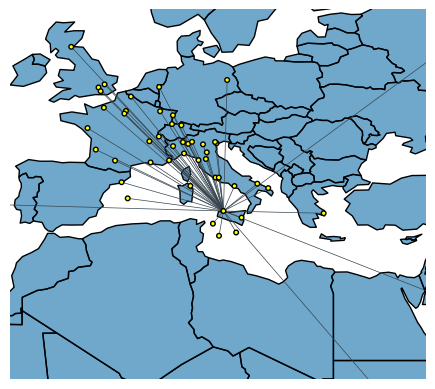

In [41]:
fig, ax = plt.subplots()

world.plot(ax=ax, figsize=(10, 10), facecolor="#0065A490", edgecolor="black")
ig.plot(pa_net, layout=layout, target=ax, edge_width=0.5, edge_color="#36454F")

plt.xlim(-10, 35)
plt.ylim(20, 60)

plt.savefig("../images/cnpa_logo.png", dpi=300, bbox_inches="tight", pad_inches=0)